Modified parameters:
dimensions of platform: L2 = 4.2426; L3 = 3.0000; gamma = 0.7854
position of anchors:    x1 = 5.0000; x2 = 0.0000; y2 = 6.0000
lengths of struts:      p1 = 5.0000; p2 = 7.0000; p3 = 3.0000


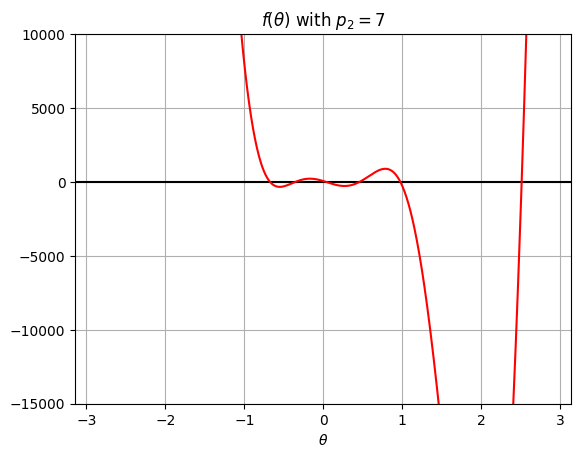

Found root theta =   6.742063, backward error = 2.2e-12
Found root theta =  -0.673157, backward error = 0.0e+00
Found root theta =  -0.354740, backward error = 0.0e+00
Found root theta =   0.458878, backward error = 3.2e-12
Found root theta =   0.977673, backward error = 2.7e-12
Found root theta =   2.513853, backward error = 5.2e-10

Total number of roots found: 6
Expected: 6 poses


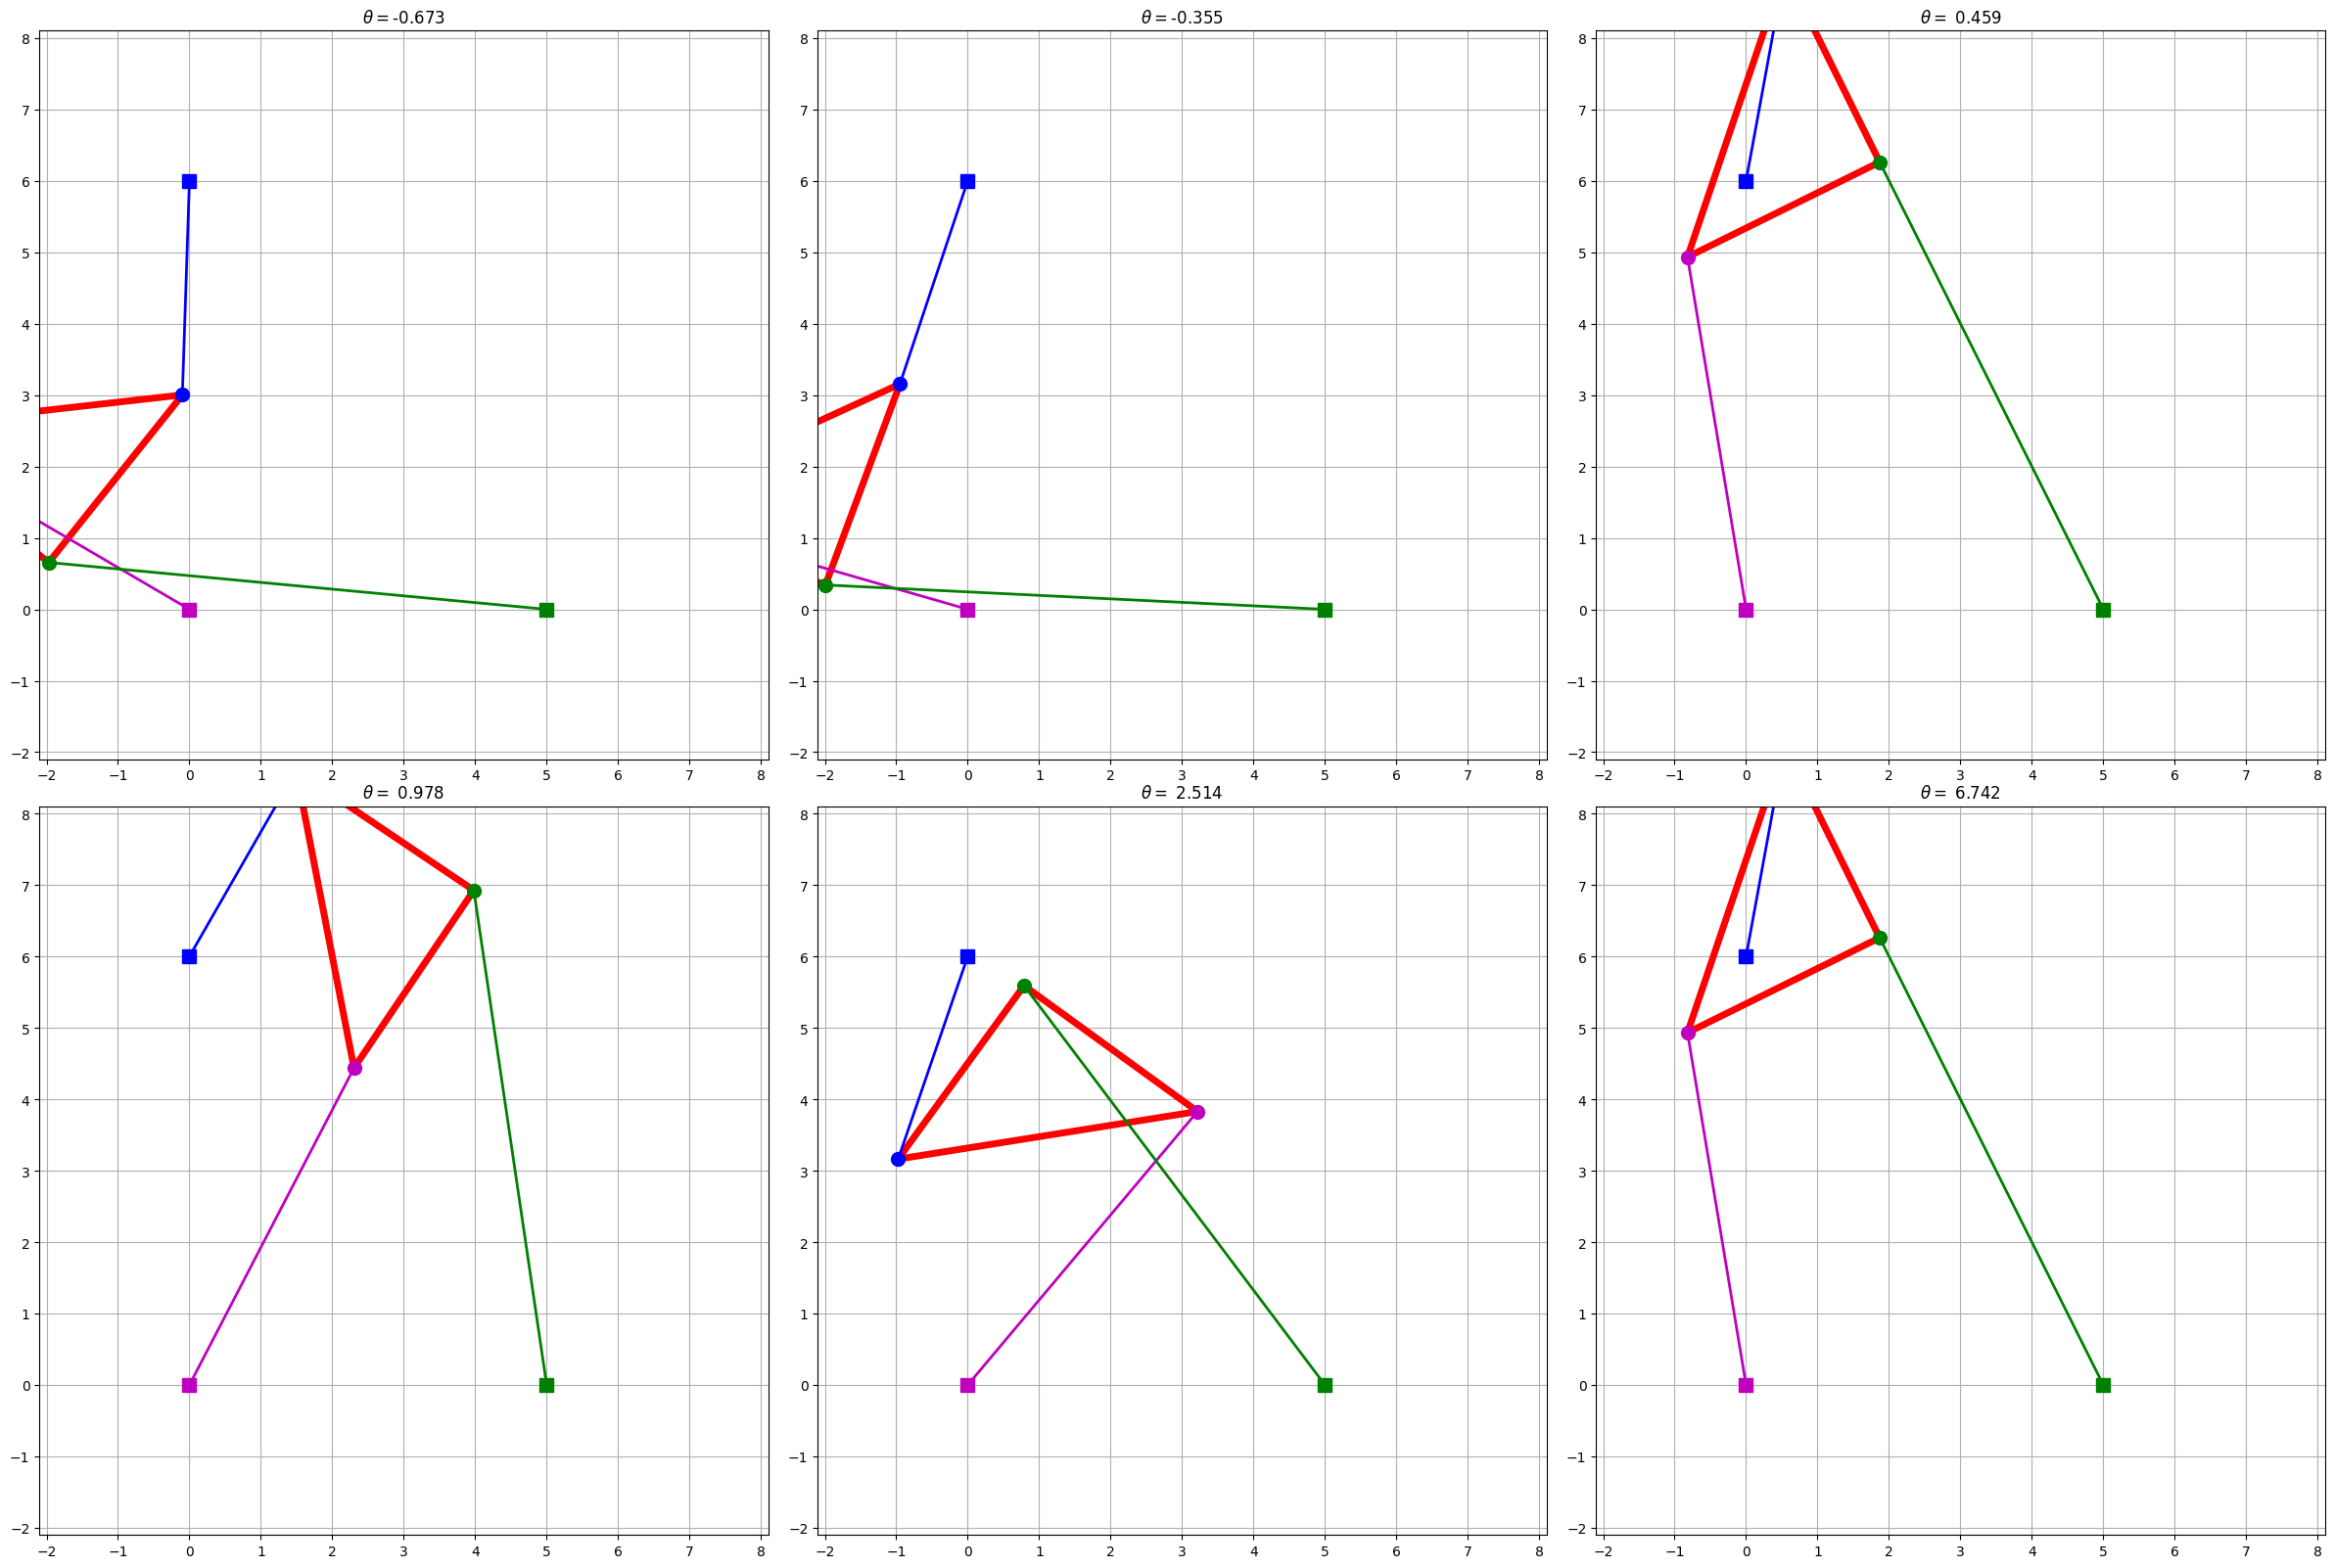


Detailed analysis of each pose:

Pose 1: theta = -0.6732; (x,y) = (-4.31, 2.53)
(u1,v1) = (-4.31, 2.53); (u2,v2) = (-1.97, 0.66); (u3,v3) = (-0.10, 3.00)
lengths of struts (recomputed): p1 = 5.0000; p2 = 7.0000; p3 = 3.0000
relative backward error = |f(theta)|: 0.00e+00

Pose 2: theta = -0.3547; (x,y) = (-4.80, 1.38)
(u1,v1) = (-4.80, 1.38); (u2,v2) = (-1.99, 0.34); (u3,v3) = (-0.95, 3.15)
lengths of struts (recomputed): p1 = 5.0000; p2 = 7.0000; p3 = 3.0000
relative backward error = |f(theta)|: 0.00e+00

Pose 3: theta = 0.4589; (x,y) = (-0.82, 4.93)
(u1,v1) = (-0.82, 4.93); (u2,v2) = (1.87, 6.26); (u3,v3) = (0.54, 8.95)
lengths of struts (recomputed): p1 = 5.0000; p2 = 7.0000; p3 = 3.0000
relative backward error = |f(theta)|: 3.18e-12

Pose 4: theta = 0.9777; (x,y) = (2.30, 4.44)
(u1,v1) = (2.30, 4.44); (u2,v2) = (3.98, 6.93); (u3,v3) = (1.49, 8.60)
lengths of struts (recomputed): p1 = 5.0000; p2 = 7.0000; p3 = 3.0000
relative backward error = |f(theta)|: 2.73e-12

Pose 5: theta = 2.

In [4]:
'''
Name: Yaseer Sabir
Subject: CSCI 4650(Numerical Analysis 1)
Section: E01
'''

from math import pi
from math import sqrt
from math import cos
from math import sin
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve

def compute_N1_N2_D( theta ):
    # Ensure theta is a scalar to avoid numpy deprecation warnings
    if hasattr(theta, '__len__') and len(theta) == 1:
        theta = theta[0]
    elif hasattr(theta, '__len__'):
        theta = float(theta[0])

    A2 = L3 * cos( theta ) - x1
    B2 = L3 * sin( theta )
    A3 = L2 * ( cos( theta ) * cos( gamma ) - sin( theta ) * sin( gamma ) ) - x2
    B3 = L2 * ( cos( theta ) * sin( gamma ) + sin( theta ) * cos( gamma ) ) - y2
    A1 = ( p2 ** 2 ) - ( p1 ** 2 ) - ( A2 ** 2 ) - ( B2 ** 2 )
    B1 = ( p3 ** 2 ) - ( p1 ** 2 ) - ( A3 ** 2 ) - ( B3 ** 2 )
    N1 =   B3 * A1 - B2 * B1
    N2 = - A3 * A1 + A2 * B1
    D = 2. * ( A2 * B3 - B2 * A3 )
    return N1, N2, D

def f( theta ):
    N1, N2, D = compute_N1_N2_D( theta )
    return ( N1 ** 2 ) + ( N2 **2 ) - ( p1 ** 2 ) * ( D**2 )

def compute_x_and_y( theta ):
    N1, N2, D = compute_N1_N2_D( theta )
    x = N1 / D
    y = N2 / D
    if ( abs( ( N1 ** 2 ) + ( N2 **2 ) - ( p1 ** 2 ) * ( D**2 ) ) > 1e-4 ):
        print("warning: compute_x_and_y: theta is not a root of f(theta)")
    return x, y

def compute_platform_corners( theta ):
    x, y = compute_x_and_y( theta )
    u1 = x
    u2 = x + L3 * cos( theta )
    u3 = x + L2 * cos( theta + gamma )
    v1 = y
    v2 = y + L3 * sin( theta )
    v3 = y + L2 * sin( theta + gamma )
    return u1, u2, u3, v1, v2, v3

def check_strut_lengths_from_corners( u1, u2, u3, v1, v2, v3):
    p1 = sqrt( u1 ** 2 + v1 ** 2 )
    p2 = sqrt( ( u2 - x1 ) ** 2 + ( v2 ) ** 2 )
    p3 = sqrt( ( u3 - x2 ) ** 2 + ( v3 - y2 ) ** 2 )
    return p1, p2, p3

def plot_platform( u1, u2, u3, v1, v2, v3, ax ):
    ax.plot( [ u1, u2, u3, u1 ], [ v1, v2, v3, v1 ], '-r', linewidth=5 )
    ax.plot( [ u1 ], [ v1 ], 'om', markersize=10 )
    ax.plot( [  0 ], [  0 ], 'sm', markersize=10 )
    ax.plot( [ 0, u1 ], [ 0, v1 ], '-m', linewidth=2 )
    ax.plot( [ u2 ], [ v2 ], 'og', markersize=10 )
    ax.plot( [ x1 ], [  0 ], 'sg', markersize=10 )
    ax.plot( [ x1, u2 ], [ 0, v2 ], '-g', linewidth=2 )
    ax.plot( [ u3 ], [ v3 ], 'ob', markersize=10 )
    ax.plot( [ x2 ], [ y2 ], 'sb', markersize=10 )
    ax.plot( [ x2, u3 ], [ y2, v3 ], '-b', linewidth=2 )
    ax.set_aspect('equal', adjustable='box')
    ax.set_xticks(np.arange(-10,10))
    ax.set_yticks(np.arange(-10,10))
    ax.grid()

# Set the dimensions of our platform (same as before)
L2 = 3 * sqrt(2)
L3 = 3
gamma = pi/4

# Set the positions of the anchors of the struts (same as before)
x1 = 5
x2 = 0
y2 = 6

# Set the lengths of the struts - CHANGED p2 to 7
p1 = 5
p2 = 7  # Changed from 5 to 7
p3 = 3

print(f"Modified parameters:")
print(f"dimensions of platform: L2 = {L2:6.4f}; L3 = {L3:6.4f}; gamma = {gamma:6.4f}")
print(f"position of anchors:    x1 = {x1:6.4f}; x2 = {x2:6.4f}; y2 = {y2:6.4f}")
print(f"lengths of struts:      p1 = {p1:6.4f}; p2 = {p2:6.4f}; p3 = {p3:6.4f}")

# Plot the function to visualize roots
xx = np.linspace( -pi, pi, 10)
yy = np.zeros([10])
plt.plot(xx, yy, '-k' );
xx = np.linspace( -pi, pi, 1000)
yy = [f(x) for x in xx]
plt.plot(xx, yy, '-r');
plt.title(r'$f(\theta)$ with $p_2 = 7$')
plt.xlabel(r'$\theta$')
plt.xlim([ -pi, pi ])
plt.ylim([-15000., 10000.])
plt.grid()
plt.show()

# Use more initial guesses to find all 6 roots
initial_guesses = [ -2.5, -1.5, -0.5, 0.5, 1.5, 2.5 ]
roots = []
tolerance = 1e-10

for x0 in initial_guesses:
    try:
        root = scipy.optimize.fsolve( f, x0 )[0]
        # Check if this is a new root (not already found)
        is_new_root = True
        for existing_root in roots:
            if abs(root - existing_root) < tolerance:
                is_new_root = False
                break

        if is_new_root and abs(f(root)) < 1e-6:  # Check backward error
            roots.append(root)
            print(f"Found root theta = {root:10.6f}, backward error = {abs(f(root)):5.1e}")
    except:
        continue

# Sort roots for better presentation
roots.sort()

print(f"\nTotal number of roots found: {len(roots)}")
print(f"Expected: 6 poses")

# Plot all the platform configurations
if len(roots) > 0:
    save_plt_rcParams = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = [ 24., 16. ]

    # Create subplot grid based on number of roots
    cols = 3
    rows = (len(roots) + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(24, 8*rows))

    # Handle case where we have fewer subplots than roots
    if rows == 1:
        axes = [axes] if len(roots) == 1 else axes
    else:
        axes = axes.flatten()

    for i, theta in enumerate(roots):
        if i < len(axes):
            plot_platform( *compute_platform_corners( theta ), axes[i] )
            axes[i].set_xlim([ -2.1, 8.1 ])
            axes[i].set_ylim([ -2.1, 8.1 ])
            axes[i].title.set_text( r"$\theta = $" + f"{theta:6.3f}" )

    # Hide unused subplots
    for i in range(len(roots), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    plt.rcParams['figure.figsize'] = save_plt_rcParams

# Print detailed information for each root
print("\nDetailed analysis of each pose:")
for i, theta in enumerate(roots):
    x, y = compute_x_and_y( theta )
    print(f"\nPose {i+1}: theta = {theta:6.4f}; (x,y) = ({x:4.2f}, {y:4.2f})")
    u1, u2, u3, v1, v2, v3 = compute_platform_corners( theta )
    print(f"(u1,v1) = ({u1:4.2f}, {v1:4.2f}); (u2,v2) = ({u2:4.2f}, {v2:4.2f}); (u3,v3) = ({u3:4.2f}, {v3:4.2f})")

    p1x, p2x, p3x = check_strut_lengths_from_corners( *compute_platform_corners( theta ) )
    print(f"lengths of struts (recomputed): p1 = {p1x:6.4f}; p2 = {p2x:6.4f}; p3 = {p3x:6.4f}")
    print(f"relative backward error = |f(theta)|: {abs(f(theta)):6.2e}")